## Lista 1 - Tópicos Especiais em Cosmologia e Astrofísica

2022

Andressa Wille

bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.integrate import quad
from scipy.integrate import odeint
import pandas as pd
import sympy as sy

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15

constantes

In [3]:
c = 3e8 #m/s
H0 = 70 #km/s/Mpc
tH0 = (1/H0)*3.086e19 #s
tH0 = (tH0/31557600)/1e9 #Gyr

print(f'velocidade da luz: {c} m/s \nconstante de Hubble: {H0} km/s/Mpc \ntempo de Hubble: {tH0} Gyr') 

velocidade da luz: 300000000.0 m/s 
constante de Hubble: 70 km/s/Mpc 
tempo de Hubble: 13.969919856299047 Gyr


In [5]:
M_sol = 4.83
L_sol = 3.83e33 #ergs/s

In [4]:
rho_m0 = 3e-27
rho_lambda0 = 6e-27
rho_r0 = 5e-31

In [5]:
h = H0/100.0
omega_m0 = 0.3
omega_lambda0 = 0.7
omega_r0 = 4.2e-5*h**(-2)
omega_k = 0.0

### Ex 1 - Lei de Hubble em baixo redshift

a)

In [8]:
emitido1 = 3954 #angstrons
observado1 = 3934 #angstrons
emitido2 = 3989 #angstrons
observado2 = 3969 #angstrons

In [9]:
z1 = (emitido1 - observado1)/observado1
z2 = (emitido2 - observado2)/observado2
z = (z1+z2)/2
print(z)

0.0050614683727715415


b)

In [30]:
v = c*z
print(v) #m/s
v = v/1000
print(v) #km/s

1518440.5118314624
1518.4405118314623


c)

In [20]:
d = v/H0 #Mpc
print(d)

21.692007311878033


d)

In [21]:
m = 12

In [22]:
d = d*(10**6) #pc
print(d)

21692007.311878033


In [23]:
M = -5*np.log10(d) + 5 + m
print(M)

-19.681498710770747


In [27]:
L = 10**((M - M_sol)/(-2.5))
print(L) #Lsol 
#R: 1.1e10 Lsun?

6376751372.413813


In [28]:
L = L_sol * 10**((M - M_sol)/(-2.5))
print(L) #ergs/s

2.44229577563449e+43


e)

In [66]:
R = 32408 #pc

theta = R/d
print(theta) #rad

0.001494006503596103


In [67]:
#rad × (60 × 180)/π = arcmin
theta2 = theta*((60*180)/np.pi)
print(theta2)

5.136016033269201


### Ex 2 - Densidades em função do redshift

a)

In [7]:
#array de redshifts
zs = np.logspace(-3,5,50)

In [8]:
#evolução das densidades
rho_m = (rho_m0)/((1/(1+zs))**3)
rho_r = (rho_r0)/((1/(1+zs))**4)
rho_lambda = rho_lambda0/(1/(1+zs))**0

In [9]:
#eras
z1 = (rho_m0/rho_r0) - 1
print(z1)
z2 = (rho_lambda0/rho_m0)**(1/3) - 1
print(z2)

5999.0
0.2599210498948732


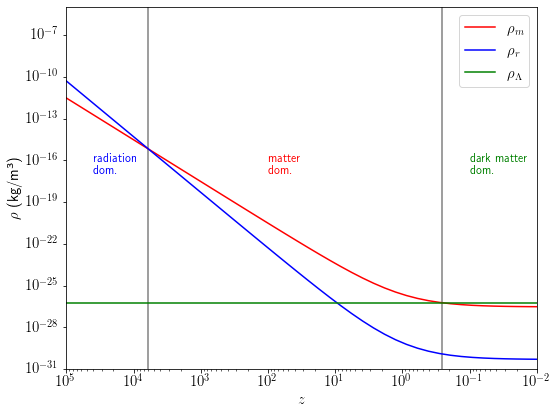

In [14]:
#plot
x1 = 10e4
x2 = 10e-3
y1 = 10e-32
y2 = 10e-6

plt.figure(figsize=[8,6])
plt.plot(zs, rho_m , 'r-', label=r'$\rho_{m}$')
plt.plot(zs, rho_r , 'b-', label=r'$\rho_{r}$')
plt.plot(zs, rho_lambda, 'g-', label=r'$\rho_{\Lambda}$')

plt.vlines(z1, y1, y2, colors='grey')
plt.vlines(z2, y1, y2, colors='grey')
plt.annotate('radiation \ndom.', xy=(4*10e3, 10e-18), fontsize=12, color='blue')
plt.annotate('matter \ndom.', xy=(10e1, 10e-18), fontsize=12, color='red')
plt.annotate('dark matter \ndom.', xy=(10e-2, 10e-18), fontsize=12, color='green')

plt.legend(loc='upper right', fontsize=15)
plt.xlabel('$z$', fontsize=15)
plt.ylabel(r'$\rho$ (kg/m³)', fontsize=15)
plt.ylim(y1,y2)
plt.xlim(x1, x2)
plt.yscale('log')
plt.xscale('log')
#plt.title('Densidades em função do redshift', fontsize=15)
plt.tight_layout()
plt.savefig('2a.png')

b) Resolução na lista.

c)

In [15]:
#array de redshifts
#b = 1+z
b = np.logspace(-2,5,50)

In [16]:
#(H0/H(z))^2
H0_H_quad = (1/(omega_lambda0 + omega_k*(b)**2 + omega_m0*(b)**3 + omega_r0*(b)**4))

In [17]:
#evolução dos parâmetros
omega_m = omega_m0*((b)**3)*H0_H_quad
omega_r = omega_r0*((b)**4)*H0_H_quad
omega_lambda = omega_lambda0*H0_H_quad

In [18]:
#eras
z1 = (1/(omega_r0/omega_m0))-1
z2 = (1/(omega_m0/omega_lambda0)**(1/3))-1
print(z1, z2)

3498.9999999999995 0.3263524026321307


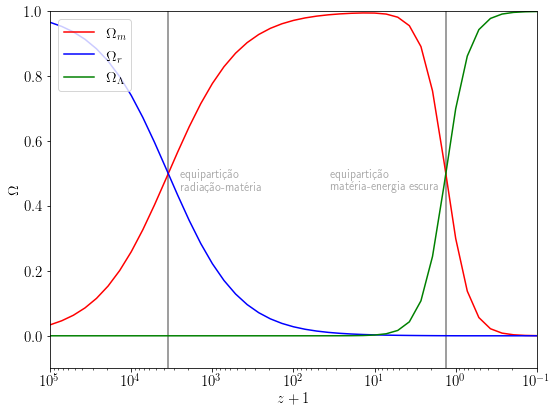

In [20]:
#plot
x1 = 10e4
x2 = 10e-2
y1 = -0.1
y2 = 1.0

plt.figure(figsize=[8,6])
plt.plot(b, omega_m, 'r-', label='$\Omega_{m}$')
plt.plot(b, omega_r, 'b-', label='$\Omega_{r}$')
plt.plot(b, omega_lambda, 'g-', label='$\Omega_{\Lambda}$')

plt.vlines(z1+1, y1, y2, colors='grey')
plt.vlines(z2+1, y1, y2, colors='grey')
plt.annotate('equipartição \nradiação-matéria', xy=(z1-1000, 0.45), fontsize=12, color='darkgrey') 
plt.annotate('equipartição \nmatéria-energia escura', xy=(z2+35, 0.45), fontsize=12, color='darkgrey') 

plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$z+1$', fontsize=15)
plt.ylabel('$\Omega$', fontsize=15)
plt.ylim(y1,y2)
plt.xlim(x1, x2)
plt.xscale('log')
#plt.title('Parâmetros de densidade em função do redshift', fontsize=15)
plt.tight_layout()
plt.savefig('2c2.png')

### Ex 3 - Evolução do fator de escala

a)

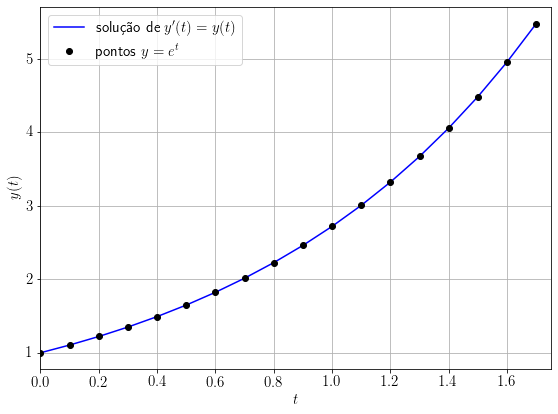

In [11]:
#lado direito da igualdade
def f(y, t):
    return (y)

#condição inicial
y0 = 1

#eixo x
x1 = 0
x2 = 1.75
t = np.arange(x1, x2, 0.1)

#solução numérica
y = odeint(f, y0, t)

#plot
plt.figure(figsize=[8,6])
plt.plot(t, y, 'b-', label="solução de $y'(t) = y(t)$")
plt.plot(t, np.exp(t), 'ko', label='pontos $y=e^t$')
plt.xlabel('$t$', fontsize=15)
plt.ylabel('$y(t)$', fontsize=15)
plt.xlim(x1, x2)
plt.legend()
plt.grid()
#plt.title('Solução exemplo', fontsize=15)
plt.tight_layout()
plt.savefig('3a.png')

b)

i)

In [31]:
#idade atual
def integrando(a):
    Ea = ((omega_r0/a**2)+(omega_m0/a)+((1-omega_m0-omega_lambda0))+omega_lambda0*a**2)**0.5
    return (1/((1/tH0)*Ea))
a = sy.Symbol('a')
idade = sy.integrate(integrando(a), (a, 0, 1)).evalf()
idade = round(idade,2)
print(f'A idade do universo ΛCDM é {idade} Gyr')

A idade do universo ΛCDM é 13.46 Gyr


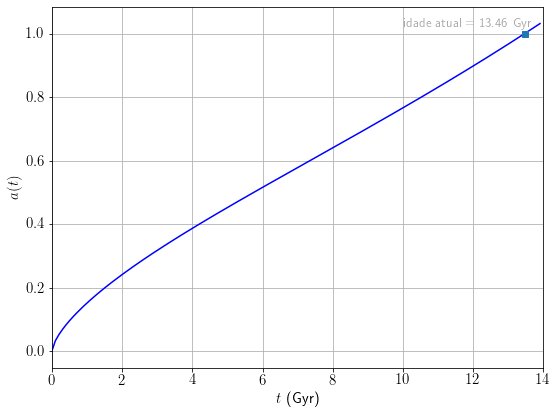

In [38]:
#lado direito da igualdade
def dadt(a, t):
    Ea = np.sqrt((omega_r0/a**2)+(omega_m0/a)+((1-omega_m0-omega_lambda0))+omega_lambda0*a**2)
    return ((1/tH0)*Ea)

#H0 em 1/Gyr

#condições inicial
a0 = [1e-12] #0
#eixo x
x1 = 0
x2 = 14

t = np.arange(x1, x2, 0.1)

#solução numérica
a = odeint(dadt, a0, t)

#plot
plt.figure(figsize=[8,6])
plot = plt.plot(t, a, 'b-')
plt.plot(idade, 1.0, 's')
plt.annotate('idade atual = 13.46 Gyr', xy=(10, 1.02), fontsize=13, color='darkgrey') 
plt.xlabel('$t$ (Gyr)', fontsize=15)
plt.ylabel('$a(t)$', fontsize=15)
plt.xlim(x1, x2)
#plt.title('Universo $\Lambda$ CDM', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('3bi.png')

ii)

In [34]:
#idade atual
def integrando(a):
    omega_m0 = 1.0
    omega_lambda0 = 0.0
    Ea = ((omega_r0/a**2)+(omega_m0/a)+((1-omega_m0-omega_lambda0))+omega_lambda0*a**2)**0.5
    return (1/((1/tH0)*Ea))
a = sy.Symbol('a')
idade = sy.integrate(integrando(a), (a, 0, 1)).evalf()
idade = round(idade,2)
print(f'A idade do universo Einstein-de Sitter é {idade} Gyr')

A idade do universo Einstein-de Sitter é 9.31 Gyr


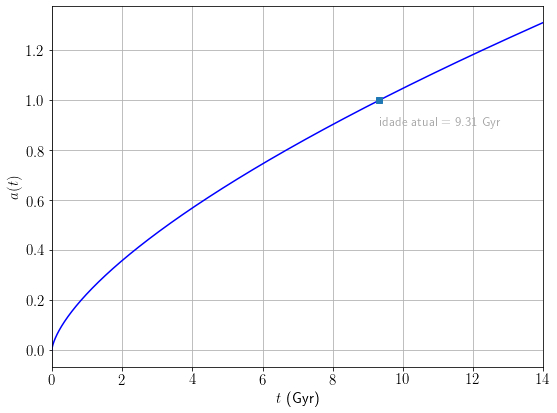

In [35]:
#lado direito da igualdade
def dadt(a, t):
#Einstein-de Sitter
    omega_m0 = 1.0
    omega_lambda0 = 0.0
    Ea = np.sqrt((omega_r0/a**2)+(omega_m0/a)+((1-omega_m0-omega_lambda0))+omega_lambda0*a**2)
    return ((1/tH0)*Ea)

#condições inicial
a0 = [1e-12] #0
#eixo x
x1 = 0
x2 = 14

t = np.arange(x1, x2, 0.01)

#solução numérica
a = odeint(dadt, a0, t)

#plot
plt.figure(figsize=[8,6])
plt.plot(t, a, 'b-')
plt.plot(idade, 1.0, 's')
plt.annotate('idade atual = 9.31 Gyr', xy=(idade, 0.9), fontsize=13, color='darkgrey') 
plt.xlabel('$t$ (Gyr)', fontsize=15)
plt.ylabel('$a(t)$', fontsize=15)
#plt.title('Universo Einstein-de Sitter', fontsize=15)
plt.xlim(x1, x2)
plt.grid()
plt.tight_layout()
plt.savefig('3bii.png')

### Ex 4 - Expansion law in a flat universe

a), b) e c) Resolução na lista.

d)

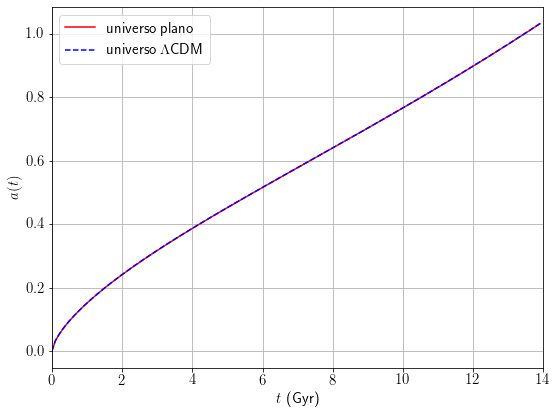

In [7]:
x1 = 0
x2 = 14

t = np.arange(x1, x2, 0.1)

a_pl = (omega_m0/omega_lambda0)**(1/3)*(np.sinh((3*(1/tH0)*np.sqrt(omega_lambda0)*t)/2))**(2/3)

plt.figure(figsize=[8,6])
plt.plot(t, a_pl, 'r-', label='universo plano')

#________#

def dadt(a, t):
    Ea = np.sqrt((omega_r0/a**2)+(omega_m0/a)+((1-omega_m0-omega_lambda0))+omega_lambda0*a**2)
    return ((1/tH0)*Ea)

a0 = [1e-12] #0

a = odeint(dadt, a0, t)

plot = plt.plot(t, a, 'b--', label='universo $\Lambda$CDM')

plt.ylabel('$a(t)$', fontsize=15)
plt.xlabel('$t$ (Gyr)', fontsize=15)
plt.xlim(x1, x2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('4d.png')

### Ex 5 - Idade e lookback time

a)

In [25]:
def time(z):
    E = np.sqrt((omega_r0)*(1+z)**4 + (omega_m0)*(1+z)**3 + (omega_k)*(1+z)**2 + omega_lambda0)
    return 1/((1+z)*E)

In [8]:
n, n_err = quad(time, 0, np.inf)

t0 = tH0*n #Gyr

print(t0)

13.462825260487774


b) e c)


In [26]:
zs = np.arange(0, 15, 0.001)

for z in zs:

    n, n_err = quad(time, z, np.inf)
    n2, n_err2 = quad(time, 0.0, z)
    
    #z da meia idade
    if n<=n2:
        print(f'metade da idade atual: t = {tH0*n}, z = {z}')
        redshift = z
        meia_idade = tH0*n
        break

metade da idade atual: t = 6.73046143771556, z = 0.781


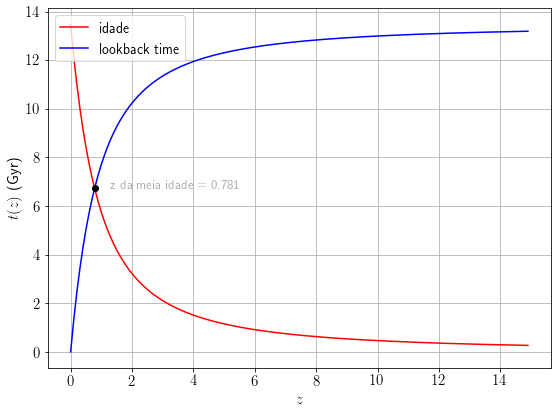

In [29]:
ts1 = []
ts2 = []

zs = np.arange(0, 15, 0.1)

for z in zs:

    n, n_err = quad(time, z, np.inf)
    n2, n_err2 = quad(time, 0.0, z)
    t = tH0*n
    ts1.append(t)
    t2 = tH0*n2
    ts2.append(t2)

plt.figure(figsize=[8,6])
plt.plot(zs, ts1, 'r-', label='idade')
plt.plot(zs, ts2, 'b-', label='lookback time')
plt.plot(redshift, meia_idade, 'ko')
plt.annotate(f'z da meia idade = {redshift}', xy=(redshift+0.5, meia_idade), fontsize=13, color='darkgrey') 

#plt.title('Idade e lookback time', fontsize=15)
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$t(z)$ (Gyr)', fontsize=15)
plt.legend(loc='upper left', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('5.png')

c)

In [22]:
n, n_err = quad(time, 0, 0.5)

t = tH0*n #Gyr

print(t)

5.040772522607013


d)

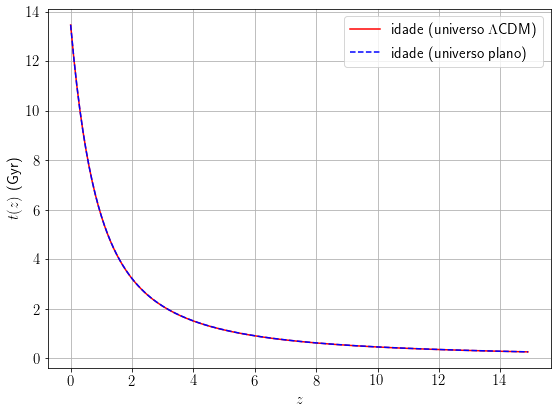

In [37]:
ts1 = []

zs = np.arange(0, 15, 0.1)

for z in zs:

    n, n_err = quad(time, z, np.inf)
    t = tH0*n
    ts1.append(t)

plt.figure(figsize=[8,6])
plt.plot(zs, ts1, 'r-', label='idade (universo $\Lambda$CDM)')

#________#


t_plano = (tH0/np.sqrt(omega_lambda0))*((2/3)*np.log(((np.sqrt(omega_lambda0*(1+zs)**-3))+(np.sqrt(omega_m0+omega_lambda0*(1+zs)**-3)))/(np.sqrt(omega_m0))))

plt.plot(zs, t_plano, 'b--', label='idade (universo plano)')

plt.xlabel('$z$', fontsize=15)
plt.ylabel('$t(z)$ (Gyr)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('5d.png')

### Ex 6 - Velocidade e redshift

a)

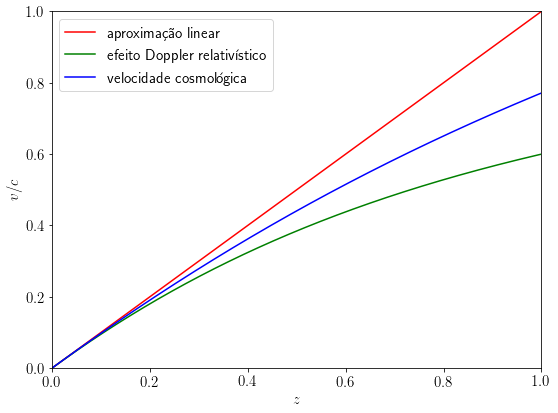

In [19]:
zs = np.linspace(5, 0, 10000)

x1 = 0
x2 = 1
y1 = 0
y2 = 1

def vel_cosmo(z):
    E = np.sqrt((omega_r0)*(1+z)**4 + (omega_m0)*(1+z)**3 + (omega_k)*(1+z)**2 + omega_lambda0)
    return 1/(E)

v_cosmo = []
aprox_linear = []
ef_doppler = []

for i in range(len(zs)):
    v_cosmo = np.append(v_cosmo, quad(vel_cosmo, 0, zs[i])[0])
    aprox_linear.append(zs[i])
    ef_doppler.append(((1+zs[i])**2-1)/((1+zs[i])**2+1))

plt.figure(figsize=[8,6])
plt.plot(zs, aprox_linear, 'r-', label='aproximação linear')
plt.plot(zs, ef_doppler, 'g-', label='efeito Doppler relativístico')
plt.plot(zs, v_cosmo, 'b-', label='velocidade cosmológica')

plt.xlabel('$z$', fontsize=15)
plt.ylabel('$v/c$', fontsize=15)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.savefig('6.png')

b)

In [21]:
# erro 10%
cosmo_linear = zs[np.where((np.abs(v_cosmo - aprox_linear)/v_cosmo) <= 0.1)[0]].max()
cosmo_doppler = zs[np.where((np.abs(v_cosmo - ef_doppler)/v_cosmo) <= 0.1)[0]].max()
print(f'É aceitável usar a aproximação linear até z={cosmo_linear} e o efeito doppler até z={cosmo_doppler}.')

É aceitável usar a aproximação linear até z=0.3850385038503852 e o efeito doppler até z=0.38003800380038033.


/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### Ex 7 - Distâncias cosmológicas

In [22]:
redshift = 3

a)

In [23]:
a = 1/(1+redshift)
print(a)

0.25


b)

In [26]:
n, n_err = quad(time, redshift, np.inf)

t3 = tH0*n

print(t3)

2.1092931343229195


c)

In [27]:
n, n_err = quad(time, 0, redshift)

t3 = tH0*n

print(t3)

11.353532126164854


d)

In [29]:
n, n_err = quad(vel_cosmo, 0, redshift)

v3 = c*n #m/s
v3 = v3/1000 #km/s

print(v3)

445100.04141355975


e)


In [30]:
def D_co(z):
    E = np.sqrt((omega_r0)*(1+z)**4 + (omega_m0)*(1+z)**3 + (omega_k)*(1+z)**2 + omega_lambda0)
    return 1/(E)

n, n_err = quad(D_co, 0, redshift)

Dco = (c/1000)/H0*n #Mpc

print(Dco)

6358.57202019371


f)

In [31]:
Dl = Dco*(1+redshift) #Mpc
print(Dl)

25434.28808077484


g)

In [32]:
Da = Dco/(1+redshift) #Mpc
print(Da)

1589.6430050484275


h)

In [33]:
M = -19

In [34]:
Dl = Dl*(1e6) #pc
m = M + 5*np.log10(Dl) - 5
print(m)

28.02709793002203


i)

In [101]:
R = 30 #kpc
R = R/1000 #Mpc

In [102]:
theta = R/Da
print(theta)
theta2 = theta*((60*180)/np.pi)
print(theta2)

1.8872161802823186e-05
0.06487771329538629
